In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
from os import listdir
from os.path import isfile, join

In [3]:
def craftingMask(path):
    '''
    Pre-processing required in setting up the images and the mask
    '''
    # 1. Read an image
    originalImage = cv2.imread(path)
    
    # 2. Convert BGR to RGB for easier interpretation
    RGBimg = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)

    # 3. Resizing the image to a fixed resolution
    resizedImg = cv2.resize(RGBimg, (1080, 720), interpolation = cv2.INTER_AREA)
    
    return resizedImg, resizedImg


In [4]:
def runon_folder(path) :
    files = None
    if(path[-1] != "/"):
        path = path + "/"
        files = [join(path,f) for f in listdir(path) if isfile(join(path,f))]
    for f in files[1:]:
        runon_image(f)
    plt.show()

In [17]:
def runon_image(path) :
    originalImage, copyImg = craftingMask(path)
    fig = plt.figure(figsize=(15,15))
    
    copyImg_gray = cv2.cvtColor(copyImg, cv2.COLOR_BGR2GRAY)
    
    kernel = np.ones((7,7), np.uint8) # Reduce Noise Of Image
    erosion = cv2.erode(copyImg_gray, kernel, iterations=1)
    opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    
    copyImg_blur = cv2.GaussianBlur(closing, (7, 7), 0)
    copyImg_edge = cv2.Canny(copyImg_blur, 75, 200)
    
    copyImg_dilatedEdge = cv2.dilate(copyImg_edge, kernel, iterations = 1)
    copyImg_contours, _ = cv2.findContours(copyImg_dilatedEdge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(copyImg_contours, key=cv2.contourArea, reverse=True)

    for contour in contours:
        # approximate each contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.05 * peri, True)
        # check if we have found our document
        if len(approx) == 4:
            doc_cnts = approx
            break
        
    cv2.drawContours(originalImage, [doc_cnts], -1, (0, 255, 0), 3)
    
    #print(doc_cnts.reshape(4,2))
    
    
#     warped = four_point_transform(originalImage, doc_cnts.reshape(4, 2))
#     warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
#     final_img = cv2.resize(warped, (600, 800))

    fig.add_subplot(4,2,1)
    plt.imshow(originalImage)
    fig.add_subplot(4,2,2)
    plt.imshow(copyImg_dilatedEdge)
    

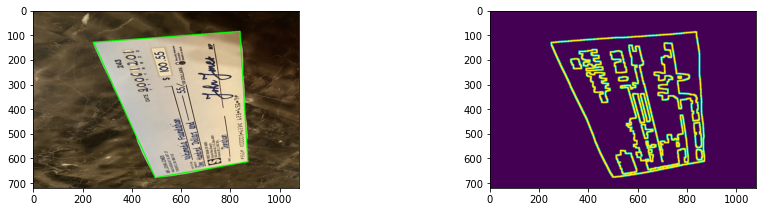

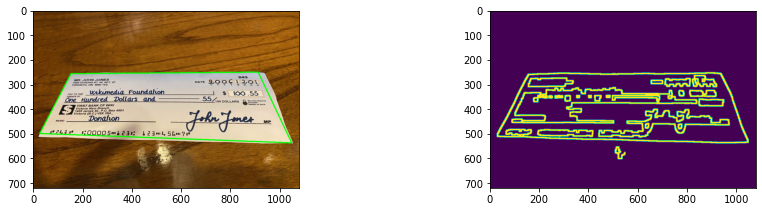

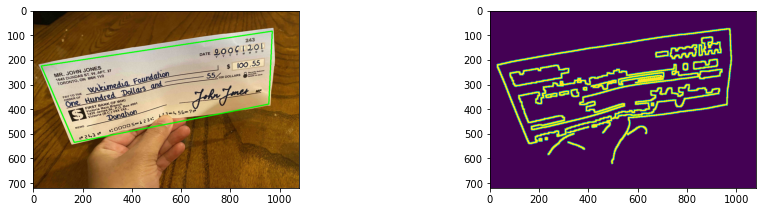

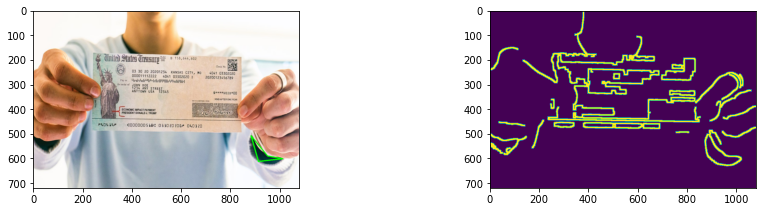

In [18]:
path = "C:\\Users\\Friday\\Desktop\\Spring22\\CS6384\\Projects\\Project3\\samples"
runon_folder(path)